# Kernal PCA

Kernalized version of PCA or LDA relates to the concepts of kernel SVM, where we create a funcion for higher dimentional space which many seperate the classes using a plane instead of using a line in two dimention.

We can think of φ as a function that creates nonlinear combinations of the original features to map the original d-dimensional dataset onto a larger, k-dimensional feature space. For example, if we had a feature vector $x \in R$ d (x is a column vector
consisting of d features) with two dimensions (d = 2) , a potential mapping onto a
3D-space could be:

\begin{aligned}
    x [x_1, x_2]^{T} \implies \ z = [x_1^2, \sqrt{2x_1 x_2}]^{T}
\end{aligned}

### Regular Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('bmh')
plt.rcParams['font.size'] = 12

### Separating Half Moon Shape

In [3]:
from sklearn.datasets import make_moons

In [4]:
X, y = make_moons(n_samples=100, random_state=123)

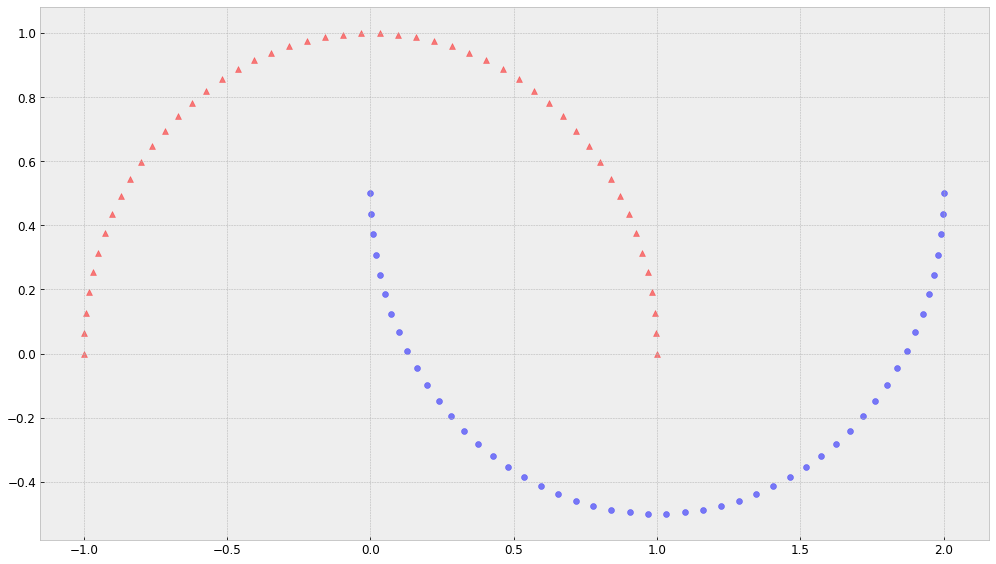

In [5]:
plt.figure(figsize=(14, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()

In [6]:
from sklearn.decomposition import PCA

In [7]:
scikit_pca = PCA(n_components=2)

In [8]:
X_spca = scikit_pca.fit_transform(X)

Text(0.5, 0, 'PC1')

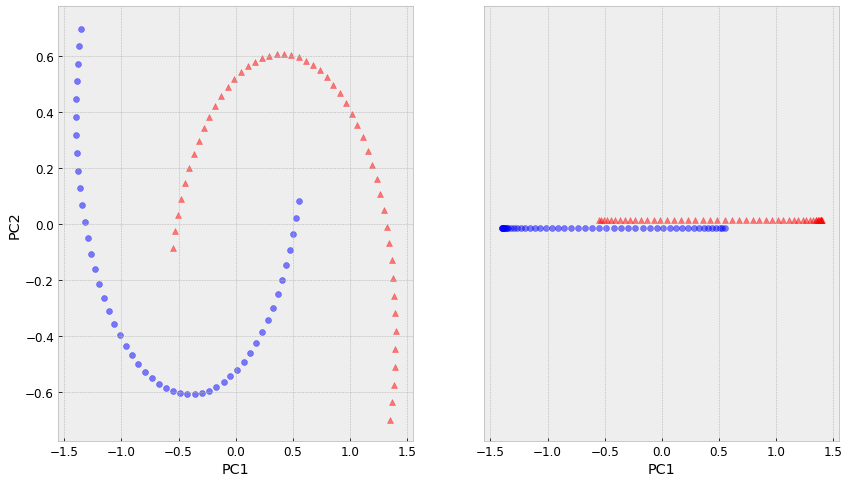

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(14, 8))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,
color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

*Note: Clearly, we can see in the resulting figure that a linear classifier would be unable to perform well on the dataset transformed via standard PCA*

In [10]:
from neuralbase.kpca import rbf_kernel_pca

In [11]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

/home/datapsycho/PycharmProjects/StatBase/03-Feature-Eng-Via-Compression/neuralbase/kpca.py:36: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))


Text(0.5, 0, 'PC1')

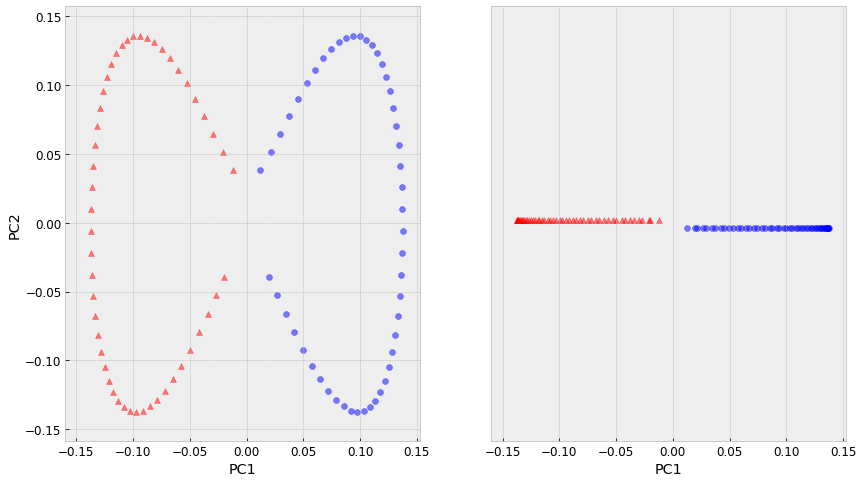

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(14,8))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

*Note: Unfortunately, there is no universal value for the tuning parameter γ that works well for different datasets. Finding a γ value that is appropriate for a given problem requires experimentation*

### Seperating Concentric Circle

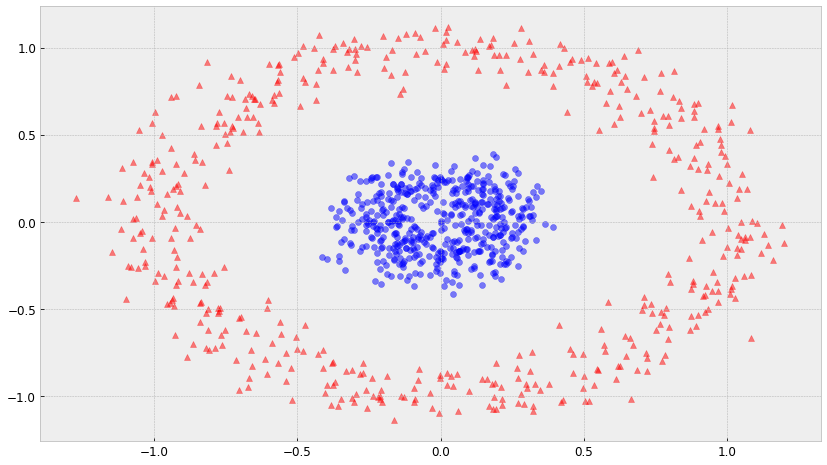

In [13]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.figure(figsize=(14, 8))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)

In [14]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

Text(0.5, 0, 'PC1')

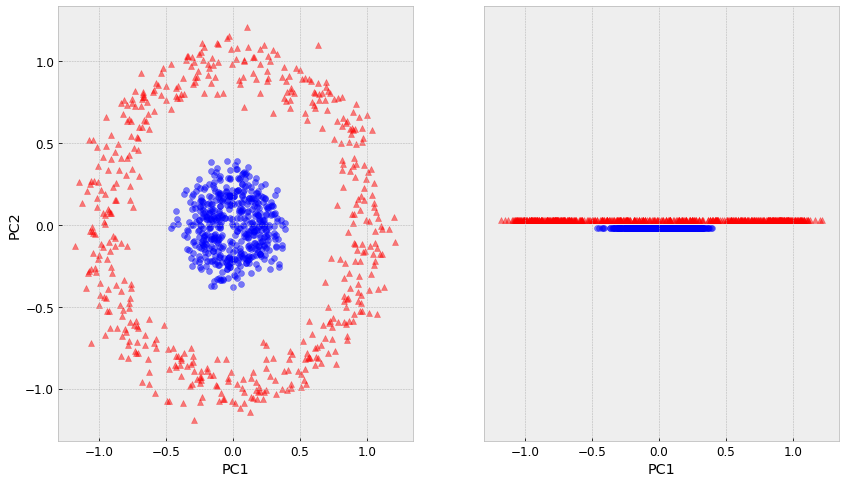

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(14,8))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

In [16]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

/home/datapsycho/PycharmProjects/StatBase/03-Feature-Eng-Via-Compression/neuralbase/kpca.py:36: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))


Text(0.5, 0, 'PC1')

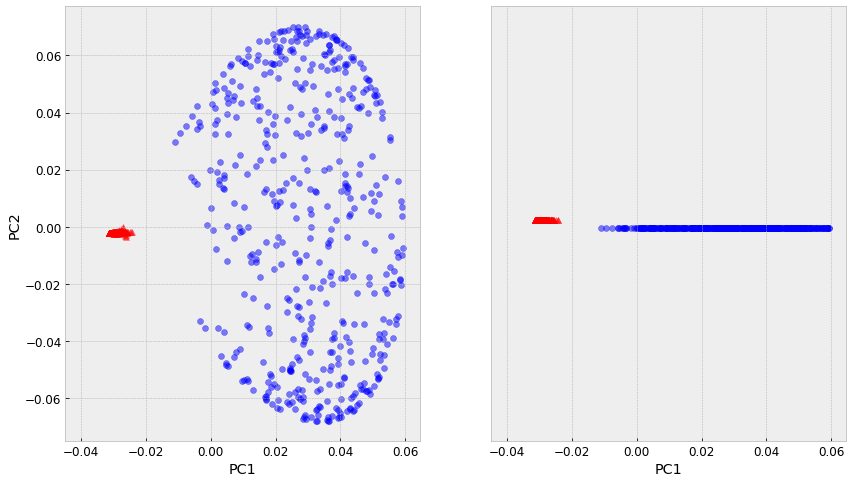

In [17]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(14,8))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,
color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,
color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

*Note: After calculating the similarity between the new samples and the samples in the training set, we have to normalize the eigenvector a by its eigenvalue.*

In [18]:
from neuralbase.kpca import rbf_kernel_pca_modified

In [20]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca_modified(X, gamma=15, n_components=1)

/home/datapsycho/PycharmProjects/StatBase/03-Feature-Eng-Via-Compression/neuralbase/kpca.py:69: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  alphas = np.column_stack((eigvecs[:, i] for i in range(n_components)))


In [21]:
x_new = X[25]
x_new

array([1.8713187 , 0.00928245])

In [22]:
x_proj = alphas[25]
x_proj

array([0.07877284])

In [23]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [24]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)

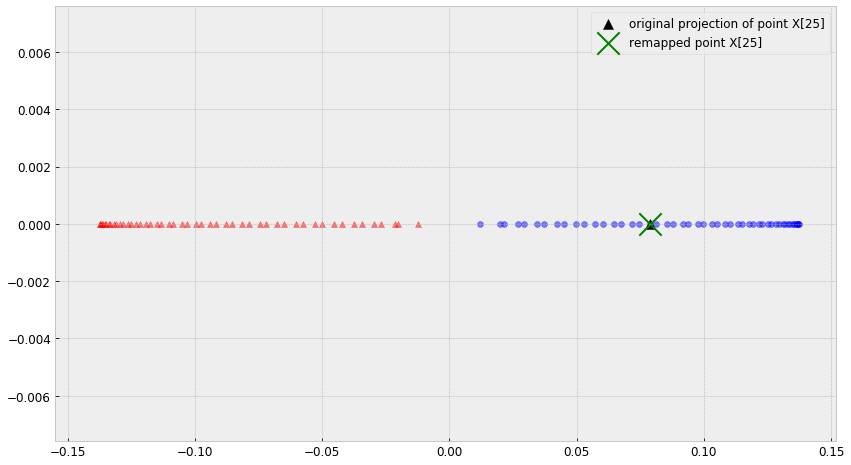

In [25]:
plt.figure(figsize=(14, 8))
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^',alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='original projection of point X[25]', marker='^', s=100) 
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)

### Kernel principal component analysis in scikit-learn

In [26]:
from sklearn.decomposition import KernelPCA

In [27]:
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

Text(0, 0.5, 'PC2')

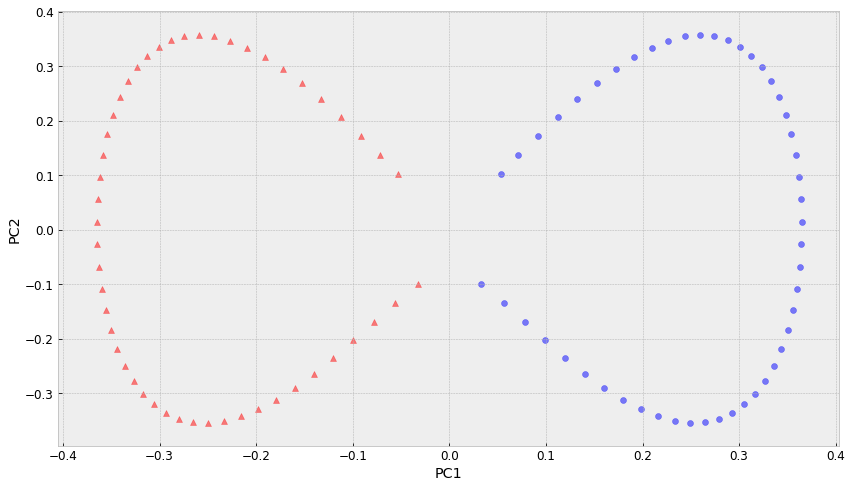

In [30]:
plt.figure(figsize=(14, 8))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')

*Note: In this chapter, you learned about three different, fundamental dimensionality reduction techniques for feature extraction: standard PCA, LDA, and kernel PCA. Using PCA, we projected data onto a lower-dimensional subspace to maximize the variance along the orthogonal feature axes, while ignoring the class labels. LDA, in contrast to PCA, is a technique for supervised dimensionality reduction, which means that it considers class information in the training dataset to attempt to maximize the class-separability in a linear feature space*